In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
dataset_dir = '/kaggle/input/bird-species-classification'

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,          
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True,    
    validation_split=0.2     
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),   
    batch_size=32,
    class_mode='binary',      
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',      
    subset='validation'
)


Found 246 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.4623 - loss: 1.3908 - val_accuracy: 0.5082 - val_loss: 0.6979
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.5408 - loss: 0.6946 - val_accuracy: 0.3770 - val_loss: 0.6986
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.5442 - loss: 0.6829 - val_accuracy: 0.4918 - val_loss: 0.7135
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5698 - loss: 0.6669 - val_accuracy: 0.5082 - val_loss: 0.7338
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.5506 - loss: 0.6919 - val_accuracy: 0.4590 - val_loss: 0.7007
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.5945 - loss: 0.6634 - val_accuracy: 0.4918 - val_loss: 0.7006
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.6359 - loss: 0.6518 - val_accuracy: 0.5082 - val_loss: 0.7302
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.6506 - loss: 0.6365 - val_accuracy: 0.5410 - val_loss: 0.6932
Epoch 9/10
8/8 ━━━━

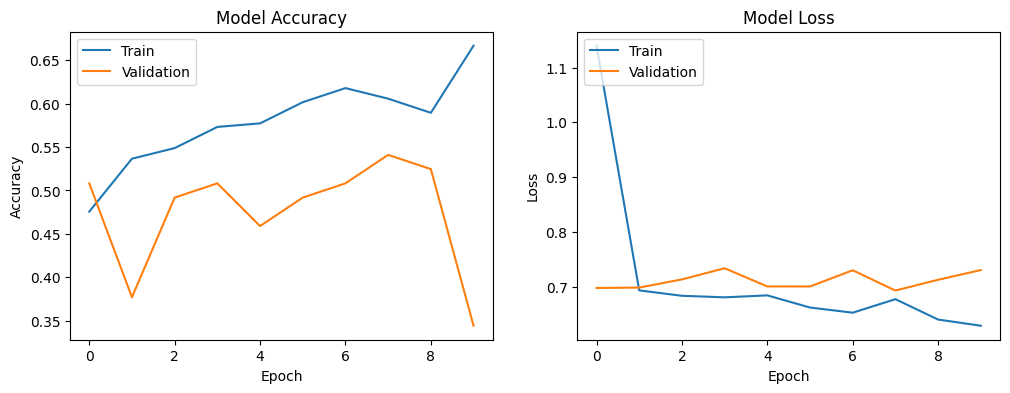

In [8]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_training_history(history)


In [10]:
model.save('bird_identifier_model.h5')



In [11]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step - accuracy: 0.3545 - loss: 0.7433
Validation Accuracy: 34.43%


In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    prediction = model.predict(img_array)
    
    if prediction[0] > 0.5:
        print("Prediction: Bird")
    else:
        print("Prediction: Not a Bird")

predict_image('/kaggle/input/bird-species-classification/test_data/test_data/himgri/IMG_5384.JPG', model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: Bird
